In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
import pandas as pd
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Dropout , MaxPooling2D , Flatten
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras import datasets
from tensorflow.keras import utils
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array , load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import rc
%matplotlib inline
rc("font" , family = "AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

In [42]:
Car_data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/InData_0729_1505.csv" ,
names = ["1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"])
seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

stright = list(Car_data.pop("7"))
back = list(Car_data.pop("8"))
trash = Car_data.pop("9")

i = 0
Go_Back = []
while i < len(stright):
    if stright[i] + back[i] < 1:
        Go_Back.append(0)
    else:
        Go_Back.append(1)
    i += 1

Car_data["7"] = Go_Back
Car_data["8"] = trash

dataset = Car_data.values

x_data = dataset[: , :7]
y_data = dataset[: , 7]
y_data = tf.keras.utils.to_categorical(y_data)

x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.3 , random_state = seed)

In [46]:
model = Sequential()
model.add(Dense(30 , input_dim = 7 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(4 , activation = "softmax"))
model.compile(loss = "categorical_crossentropy" , optimizer = optimizers.Adam(lr = 0.01) , metrics = ["acc"])

Model_dir = "./model_freecar/"
if not os.path.exists(Model_dir):
    os.mkdir(Model_dir)
    
modelpath = "./model_freecar/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
early_stop = EarlyStopping(monitor = "val_loss" , patience = 100)

hist = model.fit(x_train , y_train , epochs = 1000 , batch_size = 100 , validation_data = (x_test , y_test) , verbose = 1 , callbacks = [checkpoint , early_stop])

test_loss , test_acc = model.evaluate(x_test , y_test , verbose = 1)

print("정확도 : {:.4f}".format(test_acc))

Epoch 1/1000
19/44 [===========>..................] - ETA: 0s - loss: 1.0437 - acc: 0.6468

2021-07-30 16:10:27.176453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 12ms/step - loss: 0.8848 - acc: 0.6873 - val_loss: 0.6616 - val_acc: 0.7307

Epoch 00001: val_loss improved from inf to 0.66157, saving model to ./model_freecar/01-0.6616.hdf5
Epoch 2/1000
 7/44 [===>..........................] - ETA: 0s - loss: 0.6650 - acc: 0.7386

2021-07-30 16:10:27.626174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 11ms/step - loss: 0.6607 - acc: 0.7324 - val_loss: 0.5923 - val_acc: 0.7578

Epoch 00002: val_loss improved from 0.66157 to 0.59234, saving model to ./model_freecar/02-0.5923.hdf5
Epoch 3/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.6247 - acc: 0.7436 - val_loss: 0.6510 - val_acc: 0.7440

Epoch 00003: val_loss did not improve from 0.59234
Epoch 4/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.6288 - acc: 0.7490 - val_loss: 0.5923 - val_acc: 0.7430

Epoch 00004: val_loss improved from 0.59234 to 0.59233, saving model to ./model_freecar/04-0.5923.hdf5
Epoch 5/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.5860 - acc: 0.7606 - val_loss: 0.5619 - val_acc: 0.7754

Epoch 00005: val_loss improved from 0.59233 to 0.56193, saving model to ./model_freecar/05-0.5619.hdf5
Epoch 6/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.5773 - acc: 0.7629 - val_loss: 0.5517 - 

44/44 [==============================] - 0s 11ms/step - loss: 0.4545 - acc: 0.8144 - val_loss: 0.4809 - val_acc: 0.8030

Epoch 00043: val_loss improved from 0.48165 to 0.48086, saving model to ./model_freecar/43-0.4809.hdf5
Epoch 44/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4534 - acc: 0.8194 - val_loss: 0.4915 - val_acc: 0.8008

Epoch 00044: val_loss did not improve from 0.48086
Epoch 45/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4650 - acc: 0.8123 - val_loss: 0.4897 - val_acc: 0.7955

Epoch 00045: val_loss did not improve from 0.48086
Epoch 46/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4552 - acc: 0.8148 - val_loss: 0.5112 - val_acc: 0.8014

Epoch 00046: val_loss did not improve from 0.48086
Epoch 47/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4499 - acc: 0.8201 - val_loss: 0.4765 - val_acc: 0.7993

Epoch 00047: val_loss improved from 0.48086 to 0.47647, saving model to ./model_fre

44/44 [==============================] - 0s 11ms/step - loss: 0.4284 - acc: 0.8269 - val_loss: 0.4871 - val_acc: 0.8109

Epoch 00086: val_loss did not improve from 0.46674
Epoch 87/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4324 - acc: 0.8240 - val_loss: 0.4670 - val_acc: 0.8184

Epoch 00087: val_loss did not improve from 0.46674
Epoch 88/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4368 - acc: 0.8256 - val_loss: 0.5134 - val_acc: 0.7939

Epoch 00088: val_loss did not improve from 0.46674
Epoch 89/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4534 - acc: 0.8160 - val_loss: 0.4706 - val_acc: 0.8099

Epoch 00089: val_loss did not improve from 0.46674
Epoch 90/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4318 - acc: 0.8258 - val_loss: 0.4800 - val_acc: 0.8062

Epoch 00090: val_loss did not improve from 0.46674
Epoch 91/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4270 -

44/44 [==============================] - 0s 11ms/step - loss: 0.4296 - acc: 0.8276 - val_loss: 0.4944 - val_acc: 0.8099

Epoch 00129: val_loss did not improve from 0.46046
Epoch 130/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4202 - acc: 0.8281 - val_loss: 0.4801 - val_acc: 0.8120

Epoch 00130: val_loss did not improve from 0.46046
Epoch 131/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4211 - acc: 0.8219 - val_loss: 0.4895 - val_acc: 0.8178

Epoch 00131: val_loss did not improve from 0.46046
Epoch 132/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.4288 - acc: 0.8283 - val_loss: 0.4872 - val_acc: 0.8163

Epoch 00132: val_loss did not improve from 0.46046
Epoch 133/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4174 - acc: 0.8278 - val_loss: 0.5034 - val_acc: 0.8263

Epoch 00133: val_loss did not improve from 0.46046
Epoch 134/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4

44/44 [==============================] - 0s 11ms/step - loss: 0.4134 - acc: 0.8333 - val_loss: 0.4962 - val_acc: 0.8216

Epoch 00173: val_loss did not improve from 0.46046
Epoch 174/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4112 - acc: 0.8306 - val_loss: 0.4745 - val_acc: 0.8295

Epoch 00174: val_loss did not improve from 0.46046
Epoch 175/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4104 - acc: 0.8322 - val_loss: 0.4954 - val_acc: 0.8226

Epoch 00175: val_loss did not improve from 0.46046
Epoch 176/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4001 - acc: 0.8306 - val_loss: 0.4808 - val_acc: 0.8274

Epoch 00176: val_loss did not improve from 0.46046
Epoch 177/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4069 - acc: 0.8365 - val_loss: 0.4896 - val_acc: 0.8232

Epoch 00177: val_loss did not improve from 0.46046
Epoch 178/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.4

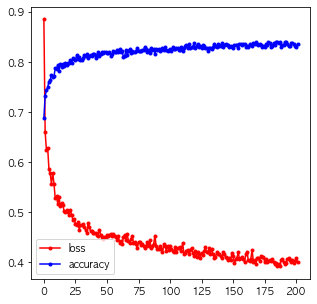

In [47]:
loss = hist.history["loss"]
accuracy = hist.history["acc"]

plt.figure(figsize = (5 , 5))
plt.plot(loss , marker = "." , c = "red" , label = "loss")
plt.plot(accuracy , marker = "." , c = "blue" , label = "accuracy")
plt.legend()
plt.show()

In [48]:
model.summary()
model.predict(x_test).flatten()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                240       
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 124       
Total params: 1,294
Trainable params: 1,294
Non-trainable params: 0
_________________________________________________________________


2021-07-30 16:12:56.998605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([3.8535665e-13, 7.7450043e-01, 1.9982447e-01, ..., 1.0194522e-02,
       9.5701808e-01, 3.2787330e-02], dtype=float32)